In [ ]:
import torch
import torch.nn as nn
import torch. optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms
from torch.utils import data

from PIL import Image
import urllib. request as request
from matplotlib import pyplot as plt

In [ ]:
from torchvision.datasets import STL10

#**dataset nuevo con dicotomico**

---

---





In [ ]:
data_path = 'data/'
full_data_set = datasets.STL10(data_path,  split='train',
                target_transform=None, download=True , transform= transforms.Compose(
                                                                                       [transforms.ToTensor(),
                                                                                       transforms.Normalize((0.4914, 0.4822, 0.4465),(0.4914, 0.4822, 0.4465))
                                                                                        ]))
full_validation_set  = datasets.STL10(data_path,  split='train',
                target_transform=None, download=True, transform=transforms.Compose(
                                                                                                   [transforms.ToTensor(),
                                                                                                   transforms.Normalize((0.4914, 0.4822, 0.4465),(0.4914, 0.4822, 0.4465))
                                                                                                   ]))

Extracting data/stl10_binary.tar.gz to data/
Files already downloaded and verified


In [ ]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle= True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dog
dog
car
ship


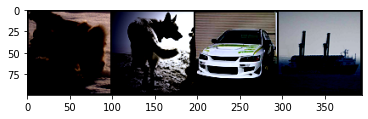

In [ ]:
data_iterator = iter(dataloader)
imgs, labels= data_iterator.next()


classes = ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']

plt.imshow(utils.make_grid(imgs).permute(1,2,0))

for i in range(size):
  print(classes[labels[i]])

In [ ]:
class_names= ['bird', 'cat']

label_map={1:0, 3:1}

data_set= [(img, label_map[label]) for img, label in full_data_set if label in [1,3]]
validation_set= [(img, label_map[label]) for img, label in full_validation_set if label in [1,3]]

In [ ]:
img, label= data_set[300]
img.shape

torch.Size([3, 96, 96])

In [ ]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()
x= torch.tensor([1.0, 2.0, 3.0])

print(softmax(x))
print(softmax(x).sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [ ]:
model= nn.Sequential(
    nn.Linear(3 * 96*96, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'cat'

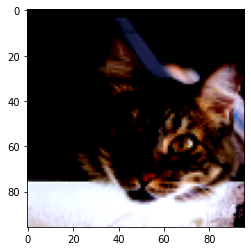

In [ ]:
img, label = data_set[400]
plt.imshow(img.permute(1,2,0))
class_names[label]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'cat'

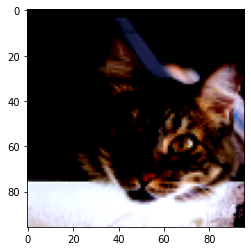

In [ ]:
out= model(img.view(-1).unsqueeze(0))

plt.imshow(img.permute(1,2,0))
class_names[label]

In [ ]:
out= model(img.view(-1).unsqueeze(0))
out

tensor([[0.5725, 0.4275]], grad_fn=<SoftmaxBackward>)

In [ ]:
_, index = torch.max(out, dim=1)

print('->', class_names[label],'model:', class_names[index])

-> cat model: bird


In [ ]:
model = nn.Sequential(
    nn.Linear(3* 96*96,512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)

loss_function= nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'cat'

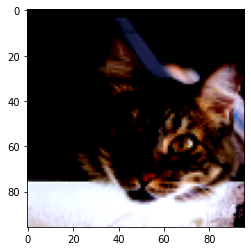

In [ ]:

img, label = data_set[400]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [ ]:
out = model(img.view(-1).unsqueeze(0))
print(out)
print('->',class_names[label],'model', class_names[index])

tensor([[-0.5290, -0.8897]], grad_fn=<LogSoftmaxBackward>)
-> cat model cat


In [ ]:
model = nn.Sequential(
    nn.Linear(3* 96*96,512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)

loss_function= nn.NLLLoss()

optimizer= optim.SGD(model.parameters(), lr= 0.01)
n_epochs= 5

for epoch in range (n_epochs):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_function(out, torch.tensor([label]))
   
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.437699
Epoch: 1, Loss: 0.067105
Epoch: 2, Loss: 0.702140
Epoch: 3, Loss: 0.000001
Epoch: 4, Loss: 0.000109


In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3* 96*96,512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)

loss_function= nn.NLLLoss()

optimizer= optim.SGD(model.parameters(), lr= 0.01)

n_epochs= 200

for epoch in range (n_epochs):
  for imgs, labels in train_loader:
    outputs = model(imgs.view(imgs.shape[0],  -1))
    loss = loss_function(outputs, labels)
   
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.746729
Epoch: 1, Loss: 0.639540
Epoch: 2, Loss: 0.593912
Epoch: 3, Loss: 0.620474
Epoch: 4, Loss: 0.484348
Epoch: 5, Loss: 0.451304
Epoch: 6, Loss: 0.454740
Epoch: 7, Loss: 0.407695
Epoch: 8, Loss: 0.435596
Epoch: 9, Loss: 0.342130
Epoch: 10, Loss: 0.409278
Epoch: 11, Loss: 0.366893
Epoch: 12, Loss: 0.305914
Epoch: 13, Loss: 0.478963
Epoch: 14, Loss: 0.459353
Epoch: 15, Loss: 0.283475
Epoch: 16, Loss: 0.262010
Epoch: 17, Loss: 0.258979
Epoch: 18, Loss: 0.161378
Epoch: 19, Loss: 0.485519
Epoch: 20, Loss: 0.200070
Epoch: 21, Loss: 0.301558
Epoch: 22, Loss: 0.167872
Epoch: 23, Loss: 0.198917
Epoch: 24, Loss: 0.246170
Epoch: 25, Loss: 0.285779
Epoch: 26, Loss: 0.178826
Epoch: 27, Loss: 0.122908
Epoch: 28, Loss: 0.128113
Epoch: 29, Loss: 0.182470
Epoch: 30, Loss: 0.125230
Epoch: 31, Loss: 0.091430
Epoch: 32, Loss: 0.084824
Epoch: 33, Loss: 0.231681
Epoch: 34, Loss: 0.080250
Epoch: 35, Loss: 0.063746
Epoch: 36, Loss: 0.085186
Epoch: 37, Loss: 0.081785
Epoch: 38, Loss: 0.063

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  bird model: bird


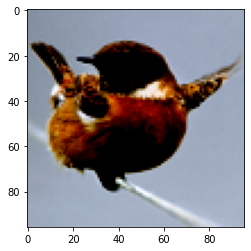

In [ ]:
img, label = validation_set[300]
out = model(img.view(-1).unsqueeze(0))

_, index = torch.max(out, dim =1)


print ('->: ', class_names[label], 'model:', class_names[index]) 
plt.imshow(img.permute(1,2,0))
plt.show()

In [ ]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle= True)


model = nn.Sequential(
    nn.Linear(3* 96*96,512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)



loss_function= nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 100


for epoch in range(n_epochs):
  for img, label in train_loader:
    out = model(img.view(img.shape[0], -1))
    loss = loss_function(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print("Epoch: %d, Loss: %f"  % (epoch, float(loss)))

Epoch: 0, Loss: 0.683048
Epoch: 0, Loss: 0.759931
Epoch: 0, Loss: 0.743118
Epoch: 0, Loss: 0.756506
Epoch: 0, Loss: 0.709521
Epoch: 0, Loss: 0.623452
Epoch: 0, Loss: 0.687606
Epoch: 0, Loss: 0.795568
Epoch: 0, Loss: 0.741376
Epoch: 0, Loss: 0.754912
Epoch: 0, Loss: 0.697686
Epoch: 0, Loss: 0.801382
Epoch: 0, Loss: 0.585970
Epoch: 0, Loss: 0.625518
Epoch: 0, Loss: 0.679945
Epoch: 0, Loss: 0.637235
Epoch: 1, Loss: 0.610115
Epoch: 1, Loss: 0.602298
Epoch: 1, Loss: 0.562870
Epoch: 1, Loss: 0.603827
Epoch: 1, Loss: 0.520068
Epoch: 1, Loss: 0.741688
Epoch: 1, Loss: 0.641473
Epoch: 1, Loss: 0.968247
Epoch: 1, Loss: 0.863486
Epoch: 1, Loss: 0.622041
Epoch: 1, Loss: 0.609480
Epoch: 1, Loss: 0.625535
Epoch: 1, Loss: 0.606019
Epoch: 1, Loss: 0.550362
Epoch: 1, Loss: 0.573595
Epoch: 1, Loss: 0.520640
Epoch: 2, Loss: 0.550848
Epoch: 2, Loss: 0.607002
Epoch: 2, Loss: 0.625517
Epoch: 2, Loss: 0.524571
Epoch: 2, Loss: 0.691997
Epoch: 2, Loss: 0.643465
Epoch: 2, Loss: 0.669232
Epoch: 2, Loss: 0.522459


In [ ]:
val_loader= torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle= False)


correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs= model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

print("Acurracy: %f" % (correct / total))

Acurracy: 1.000000


In [ ]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])


14157314

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct cat:  model: bird


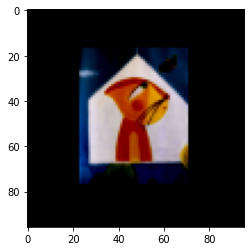

In [ ]:
'''Comparacion con una imagen engoñosa'''

url = 'https://elloboferoz.com/site/wp-content/uploads/2018/10/gato-pajaro.jpg'

image = request.urlretrieve(url, 'test1.jpg')
img = Image.open(image[0])

preprocess = transforms.Compose([
             transforms.Resize(48),
             transforms.CenterCrop(96),
             transforms.ToTensor(),
             transforms.Normalize(
                 mean= [0.4914, 0.4822, 0.4465],
                 std= [0.4914, 0.4822, 0.4465]
             )
])



img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out,dim=1)
print('correct cat: ', 'model:', class_names[index])
plt.imshow(img_t.permute(1,2,0))

#**dataset nuevo normal**

---

---





In [ ]:
data_path = 'data/'

dataset = datasets.STL10(data_path, split='train', target_transform=None, download=True )

validation_dataset = datasets.STL10(data_path, split='train', target_transform=None, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']


In [ ]:
print(len(dataset))
len(validation_dataset)

5000


5000

In [ ]:
img, label = dataset[3000]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=96x96 at 0x7F4C97EFA160>, 6, 'horse')

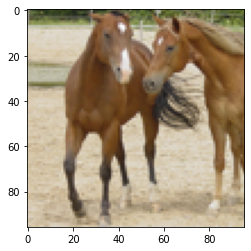

In [ ]:
plt.imshow(img)

In [ ]:
tensor_trasnform = transforms.ToTensor()

img_tensor = tensor_trasnform(img)
img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=96x96 at 0x7F4C97EFA160>,
 tensor([[[0.5765, 0.3451, 0.2392,  ..., 0.3294, 0.3255, 0.4000],
          [0.5686, 0.4196, 0.4078,  ..., 0.3020, 0.4078, 0.4039],
          [0.5922, 0.3804, 0.3529,  ..., 0.4275, 0.4314, 0.3137],
          ...,
          [0.8078, 0.8078, 0.8471,  ..., 0.8157, 0.8314, 0.8510],
          [0.8588, 0.8588, 0.8392,  ..., 0.8353, 0.8510, 0.8471],
          [0.8392, 0.8078, 0.8510,  ..., 0.8235, 0.8392, 0.8510]],
 
         [[0.5725, 0.3882, 0.3059,  ..., 0.3961, 0.3843, 0.4510],
          [0.5608, 0.4471, 0.4627,  ..., 0.3686, 0.4627, 0.4627],
          [0.5882, 0.4000, 0.3922,  ..., 0.4667, 0.4784, 0.3608],
          ...,
          [0.7373, 0.7529, 0.7922,  ..., 0.7529, 0.7647, 0.7843],
          [0.8078, 0.8118, 0.7725,  ..., 0.7804, 0.8000, 0.8039],
          [0.7882, 0.7451, 0.7882,  ..., 0.7647, 0.7765, 0.8118]],
 
         [[0.5216, 0.2431, 0.1725,  ..., 0.1569, 0.1725, 0.1804],
          [0.5098, 0.2824, 0.2784,  ..., 0

In [ ]:
dataset= datasets.STL10(data_path,  split='train', target_transform=None, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [ ]:
img, label = dataset[3000]
img

tensor([[[0.5765, 0.3451, 0.2392,  ..., 0.3294, 0.3255, 0.4000],
         [0.5686, 0.4196, 0.4078,  ..., 0.3020, 0.4078, 0.4039],
         [0.5922, 0.3804, 0.3529,  ..., 0.4275, 0.4314, 0.3137],
         ...,
         [0.8078, 0.8078, 0.8471,  ..., 0.8157, 0.8314, 0.8510],
         [0.8588, 0.8588, 0.8392,  ..., 0.8353, 0.8510, 0.8471],
         [0.8392, 0.8078, 0.8510,  ..., 0.8235, 0.8392, 0.8510]],

        [[0.5725, 0.3882, 0.3059,  ..., 0.3961, 0.3843, 0.4510],
         [0.5608, 0.4471, 0.4627,  ..., 0.3686, 0.4627, 0.4627],
         [0.5882, 0.4000, 0.3922,  ..., 0.4667, 0.4784, 0.3608],
         ...,
         [0.7373, 0.7529, 0.7922,  ..., 0.7529, 0.7647, 0.7843],
         [0.8078, 0.8118, 0.7725,  ..., 0.7804, 0.8000, 0.8039],
         [0.7882, 0.7451, 0.7882,  ..., 0.7647, 0.7765, 0.8118]],

        [[0.5216, 0.2431, 0.1725,  ..., 0.1569, 0.1725, 0.1804],
         [0.5098, 0.2824, 0.2784,  ..., 0.1176, 0.1804, 0.1804],
         [0.5373, 0.2745, 0.2353,  ..., 0.2784, 0.2706, 0.

In [ ]:
img.min(), img.max()

(tensor(0.0510), tensor(0.9961))

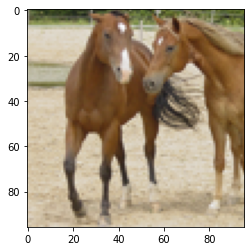

In [ ]:
plt.imshow(img.permute(1,2,0))

In [ ]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [ ]:
imgs.shape

torch.Size([3, 96, 96, 5000])